In [5]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 
  
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
print(covertype.variables) 


{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

In [6]:
# 1. CARGA DEL DATASET

covertype = fetch_ucirepo(id=31)  # Dataset: Forest CoverType
df = covertype.data.original
df_1= df.copy()

In [7]:
df["Soil_Type31"].value_counts()

Soil_Type31
0    555346
1     25666
Name: count, dtype: int64

In [8]:
# Manipulación de datos
import pandas as pd
import numpy as np

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets y preprocesamiento
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler

# Modelos de clasificación
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier

# Reducción de dimensionalidad y clustering
from sklearn.decomposition import PCA, FastICA
from sklearn.cluster import KMeans

# Pipeline y métricas
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [9]:
print(df.head())

   Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0       2596      51      3                               258   
1       2590      56      2                               212   
2       2804     139      9                               268   
3       2785     155     18                               242   
4       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238   

In [10]:
print(df["Cover_Type"].value_counts())

Cover_Type
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: count, dtype: int64


In [11]:
X,y = df.drop("Cover_Type", axis=1), df["Cover_Type"] 
X = np.log(abs(X)+1) 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=np.array(y))
print(f"Esta es la forma de los conjunto prueba.", "Para entrenamiento", X_train.shape, y_train.shape," Para test", X_test.shape, y_test.shape)

Esta es la forma de los conjunto prueba. Para entrenamiento (464809, 54) (464809,)  Para test (116203, 54) (116203,)


In [12]:
import sklearn.decomposition as decomposition

# 2. Calcular ICA y PCA
ica = FastICA(random_state=42, whiten="arbitrary-variance")
S_ICA = ica.fit_transform(X_train)

pca = PCA(random_state=42)
S_PCA = pca.fit_transform(X_train)

# 3. Clustering en componentes ICA
kmeans = KMeans(random_state=42)
kmeans.fit(S_ICA)
y_kmeans = kmeans.predict(S_ICA)

c:\Users\Coder\Documents\Ensamble\proyecto7-problema-clasificacion-multiclase-grupo5\venv\Lib\site-packages\sklearn\decomposition\_fastica.py:127: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


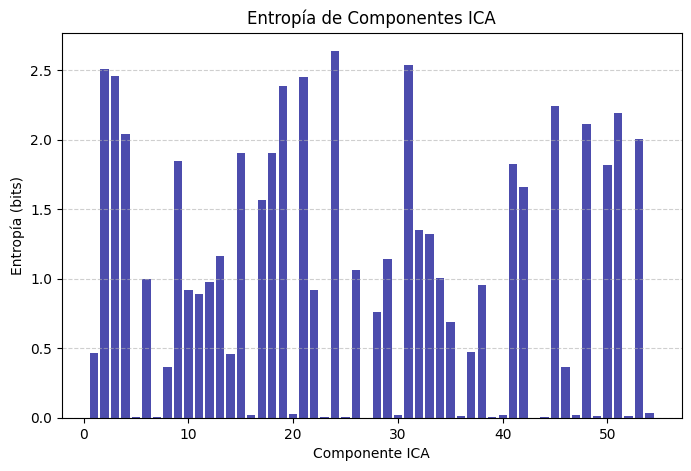

In [13]:
from scipy.stats import entropy  

# 4. Calcular entropía de cada componente ICA
entropias = []
for i in range(S_ICA.shape[1]):
    hist, _ = np.histogram(S_ICA[:, i], bins=30, density=True)
    hist = hist[hist > 0]  # evitar log(0)
    entropias.append(entropy(hist))

# 5. Graficar entropía de las componentes
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(entropias) + 1), entropias, color='Darkblue', alpha=0.7)
plt.title("Entropía de Componentes ICA")
plt.xlabel("Componente ICA")
plt.ylabel("Entropía (bits)")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

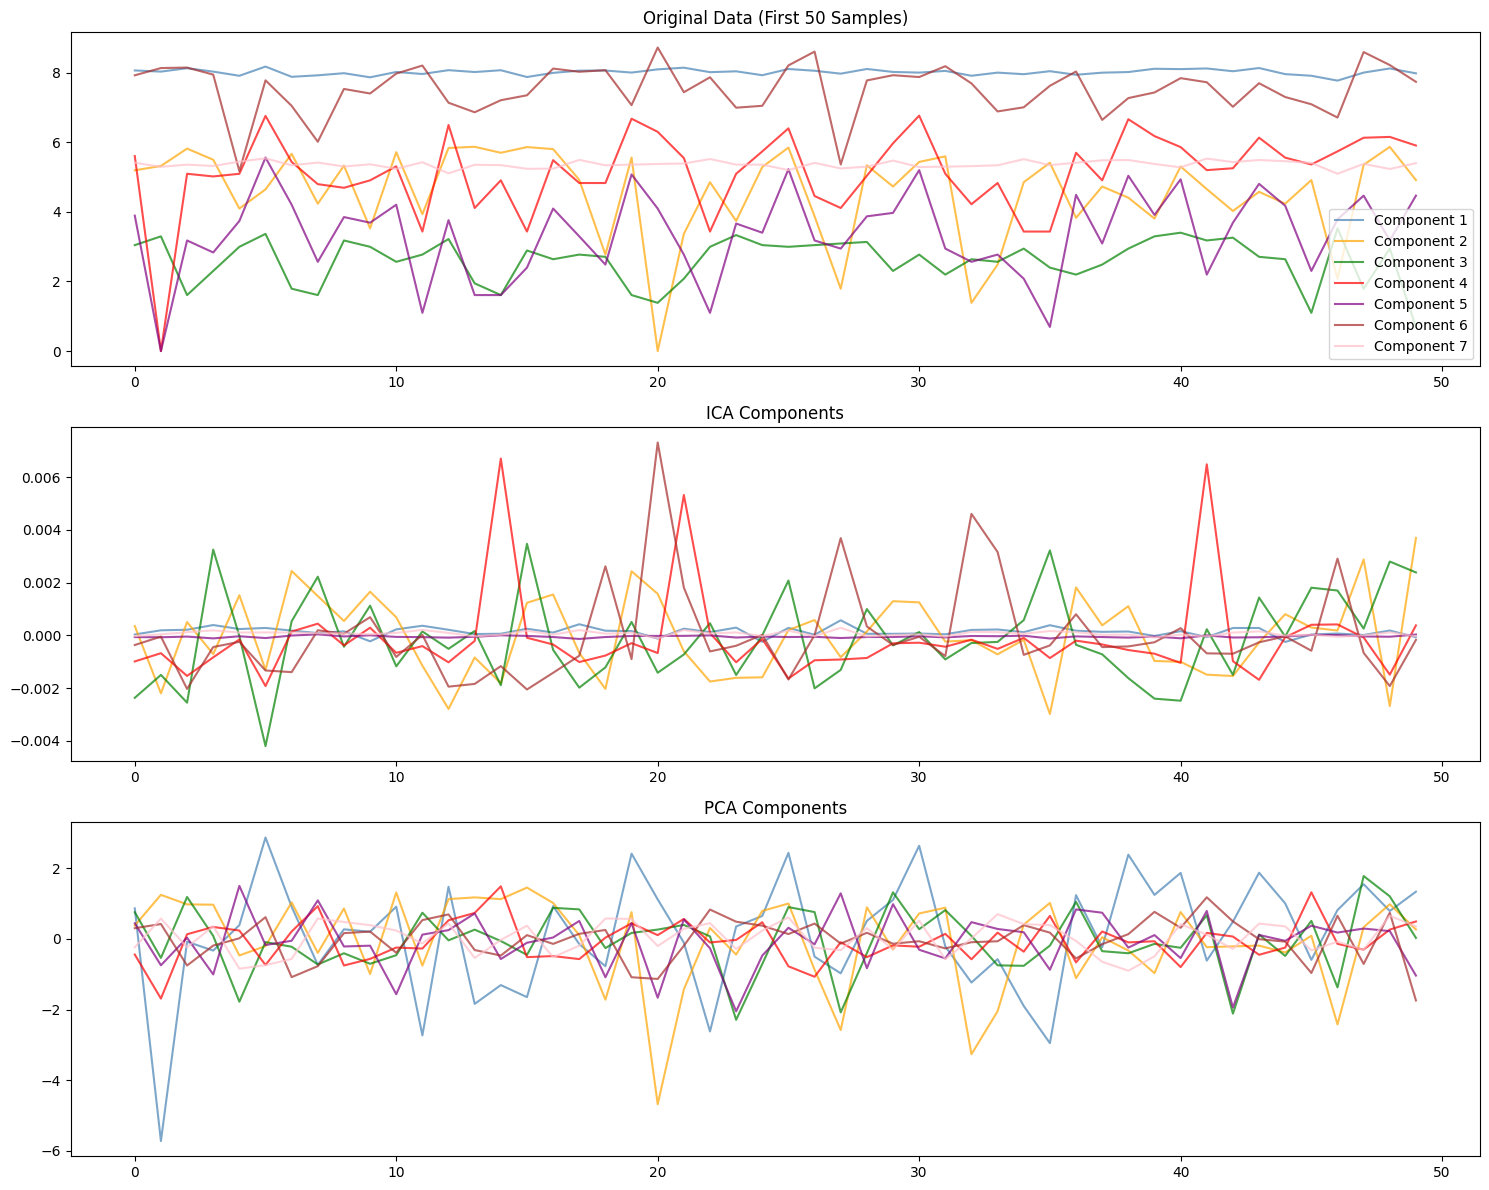

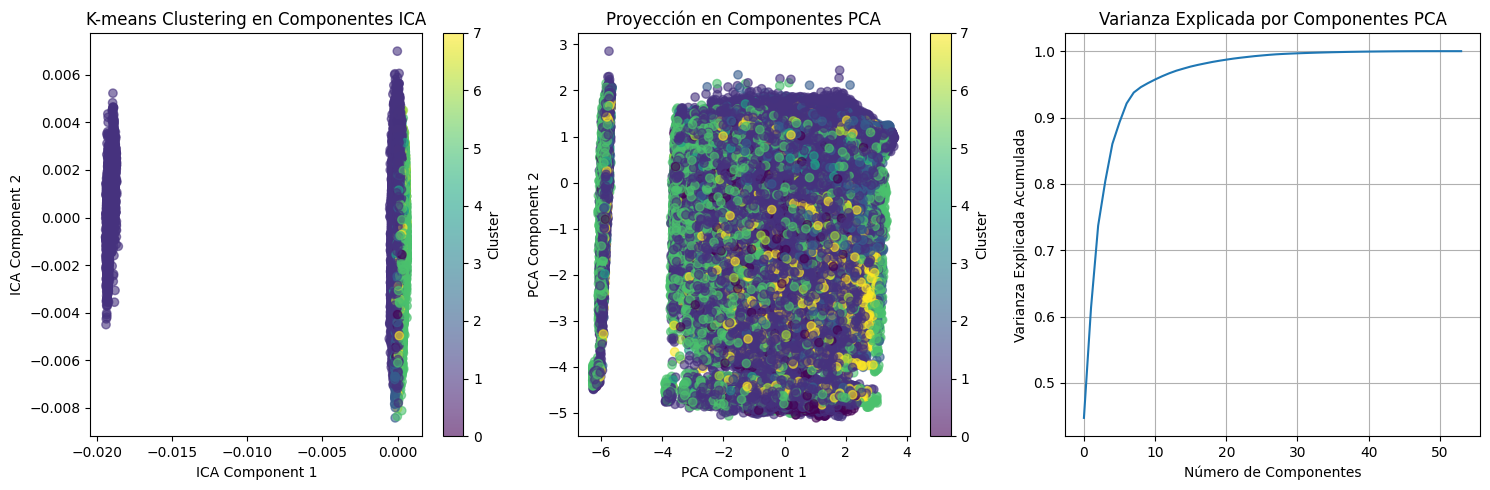

In [14]:
# 6. Visualización de componentes
plt.figure(figsize=(15, 12))
n_components_plot = min(7, X_train.shape[1])

models = [X_train.iloc[:50].to_numpy(), S_ICA[:50], S_PCA[:50]]
names = [
    "Original Data (First 50 Samples)",
    "ICA Components", 
    "PCA Components"
]
colors = ["steelblue", "orange", "green", "red", "purple", "brown", "pink"]

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(3, 1, ii)
    plt.title(name)
    
    for j in range(min(model.shape[1], n_components_plot)):
        plt.plot(model[:, j], color=colors[j % len(colors)], alpha=0.7, label=f'Component {j+1}')
    
    if ii == 1:
        plt.legend()

plt.tight_layout()
plt.show()

# 7. Visualización de clustering
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(S_ICA[:, 0], S_ICA[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6)
plt.title('K-means Clustering en Componentes ICA')
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.colorbar(label='Cluster')

plt.subplot(1, 3, 2)
plt.scatter(S_PCA[:, 0], S_PCA[:, 1], c=y_kmeans, cmap='viridis', alpha=0.6)
plt.title('Proyección en Componentes PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')

plt.subplot(1, 3, 3)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('Varianza Explicada por Componentes PCA')
plt.grid(True)

plt.tight_layout()
plt.show()


In [15]:
# Mejorar la definición de modelos base con pipelines de preprocesamiento
base_models = [
    ('lr', Pipeline([
        ('model', LogisticRegression(
            penalty='l2',             # regularización L2 (ridge), evita sobreajuste
            C=1.0,                    # inverso de la fuerza de regularización
            solver='saga',           
            max_iter=500,             # más iteraciones para asegurar convergencia
            class_weight='balanced',  # útil si hay clases desbalanceadas
            random_state=42,
            n_jobs=-1                 # usa todos los núcleos si el solver lo permite
        ))
    ])),
    ('knn', Pipeline([
        ('model', KNeighborsClassifier(
            n_neighbors=7,           # puedes ajustar con validación cruzada
            weights='distance',      # pondera vecinos más cercanos más fuertemente
            algorithm='auto',        # 'auto', 'ball_tree', 'kd_tree', 'brute'
            leaf_size=30,            # afecta la velocidad de construcción del árbol y query
            p=2,                     # 2 -> distancia Euclidiana, 1 -> Manhattan
            metric='minkowski',      # métrica de distancia, compatible con p
            n_jobs=-1                # usa todos los núcleos
        ))
    ])),
    ('dt', DecisionTreeClassifier(
        criterion='gini',          # o 'entropy' o 'log_loss' — mide la calidad de las divisiones
        splitter='best',           # 'best' busca la mejor división, 'random' añade aleatoriedad
        max_depth=12,              # ligeramente menor para evitar sobreajuste si el dataset es pequeño
        min_samples_split=10,      # evita divisiones en grupos demasiado pequeños
        min_samples_leaf=5,        # tamaño mínimo de cada hoja, mejora generalización
        max_features=None,         # o 'sqrt' / 'log2' para limitar características por división
        class_weight='balanced',   # útil si hay clases desbalanceadas
        random_state=42            # reproducibilidad
    ))
]

#  Meta-clasificador con mejor configuración
meta_model = LogisticRegression(
    max_iter=500,  # Más iteraciones para convergencia
    C=0.1,          # Regularización
    random_state=42
)

# Stacking classifier optimizado
stacking_clf = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1,
    passthrough=True,   # Mantener características originales
    stack_method='auto' # Selección automática del método de predicción
)


In [16]:
# Entrenamiento del stacking
stacking_clf.fit(X_train, y_train)

# Predicción y evaluación
y_pred = stacking_clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

c:\Users\Coder\Documents\Ensamble\proyecto7-problema-clasificacion-multiclase-grupo5\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 500 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=500).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.9098474221835925
Reporte de clasificación:
               precision    recall  f1-score   support

           1       0.90      0.91      0.90     42368
           2       0.92      0.92      0.92     56661
           3       0.92      0.92      0.92      7151
           4       0.88      0.83      0.86       549
           5       0.87      0.74      0.80      1899
           6       0.86      0.84      0.85      3473
           7       0.92      0.93      0.93      4102

    accuracy                           0.91    116203
   macro avg       0.90      0.87      0.88    116203
weighted avg       0.91      0.91      0.91    116203



In [17]:
import joblib

# Guardar el modelo
joblib.dump(stacking_clf, 'stacking_model.pkl')

# Cargar el modelo después
stacking_loaded = joblib.load('stacking_model.pkl')

# Usarlo para predecir
y_pred_loaded = stacking_loaded.predict(X_test)


In [18]:
#  Logistic Regression

lr_original = LogisticRegression(
    penalty='l2',             
    C=1.0,                    
    solver='saga',           
    max_iter=500,             
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1                 
)
lr_original.fit(X_train, y_train)

lr_ica = LogisticRegression(
    penalty='l2',             
    C=1.0,                    
    solver='saga',           
    max_iter=500,             
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1                 
)
lr_ica.fit(S_ICA, y_train)

lr_pca = LogisticRegression(
    penalty='l2',             
    C=1.0,                    
    solver='saga',           
    max_iter=500,             
    class_weight='balanced',  
    random_state=42,
    n_jobs=-1                 
)
lr_pca.fit(S_PCA, y_train)

c:\Users\Coder\Documents\Ensamble\proyecto7-problema-clasificacion-multiclase-grupo5\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Coder\Documents\Ensamble\proyecto7-problema-clasificacion-multiclase-grupo5\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Coder\Documents\Ensamble\proyecto7-problema-clasificacion-multiclase-grupo5\venv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,42
,solver,'saga'
,max_iter,500
,multi_class,'deprecated'


In [19]:

#  KNeighborsClassifier

knn_original = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1
)
knn_original.fit(X_train, y_train)

knn_ica = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1
)
knn_ica.fit(S_ICA, y_train)

knn_pca = KNeighborsClassifier(
    n_neighbors=7,
    weights='distance',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski',
    n_jobs=-1
)
knn_pca.fit(S_PCA, y_train)


,n_neighbors,7
,weights,'distance'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,-1


In [20]:
#  DecisionTreeClassifier

tree_original = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    class_weight='balanced',
    random_state=42
)
tree_original.fit(X_train, y_train)

tree_ica = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    class_weight='balanced',
    random_state=42
)
tree_ica.fit(S_ICA, y_train)

tree_pca = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features=None,
    class_weight='balanced',
    random_state=42
)
tree_pca.fit(S_PCA, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,12
,min_samples_split,10
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,'balanced'


In [21]:

#  Guardado de modelos entrenados

import joblib
import os

# Crear carpeta para guardar modelos
os.makedirs("modelos_guardados", exist_ok=True)

# Guardar modelos Logistic Regression
joblib.dump(lr_original, "modelos_guardados/lr_original.pkl")
joblib.dump(lr_ica, "modelos_guardados/lr_ica.pkl")
joblib.dump(lr_pca, "modelos_guardados/lr_pca.pkl")

# Guardar modelos KNN
joblib.dump(knn_original, "modelos_guardados/knn_original.pkl")
joblib.dump(knn_ica, "modelos_guardados/knn_ica.pkl")
joblib.dump(knn_pca, "modelos_guardados/knn_pca.pkl")

# Guardar modelos Árboles
joblib.dump(tree_original, "modelos_guardados/tree_original.pkl")
joblib.dump(tree_ica, "modelos_guardados/tree_ica.pkl")
joblib.dump(tree_pca, "modelos_guardados/tree_pca.pkl")



print(" Modelos guardados correctamente ")


 Modelos guardados correctamente 


In [22]:
#  Evaluación de los modelos
S_ICA_test = ica.transform(X_test)
S_PCA_test = pca.transform(X_test)

test_scores = {
    # Logistic Regression
    'LR_Original': accuracy_score(y_test, lr_original.predict(X_test)),
    'LR_ICA': accuracy_score(y_test, lr_ica.predict(S_ICA_test)),
    'LR_PCA': accuracy_score(y_test, lr_pca.predict(S_PCA_test)),

    # KNN
    'KNN_Original': accuracy_score(y_test, knn_original.predict(X_test)),
    'KNN_ICA': accuracy_score(y_test, knn_ica.predict(S_ICA_test)),
    'KNN_PCA': accuracy_score(y_test, knn_pca.predict(S_PCA_test)),

    # Árboles
    'Tree_Original': accuracy_score(y_test, tree_original.predict(X_test)),
    'Tree_ICA': accuracy_score(y_test, tree_ica.predict(S_ICA_test)),
    'Tree_PCA': accuracy_score(y_test, tree_pca.predict(S_PCA_test)),

}

print("Resultados de Accuracy:")
for k, v in test_scores.items():
    print(f"{k}: {v:.4f}")

Resultados de Accuracy:
LR_Original: 0.4367
LR_ICA: 0.5169
LR_PCA: 0.6008
KNN_Original: 0.8955
KNN_ICA: 0.9265
KNN_PCA: 0.8955
Tree_Original: 0.7047
Tree_ICA: 0.6678
Tree_PCA: 0.6947


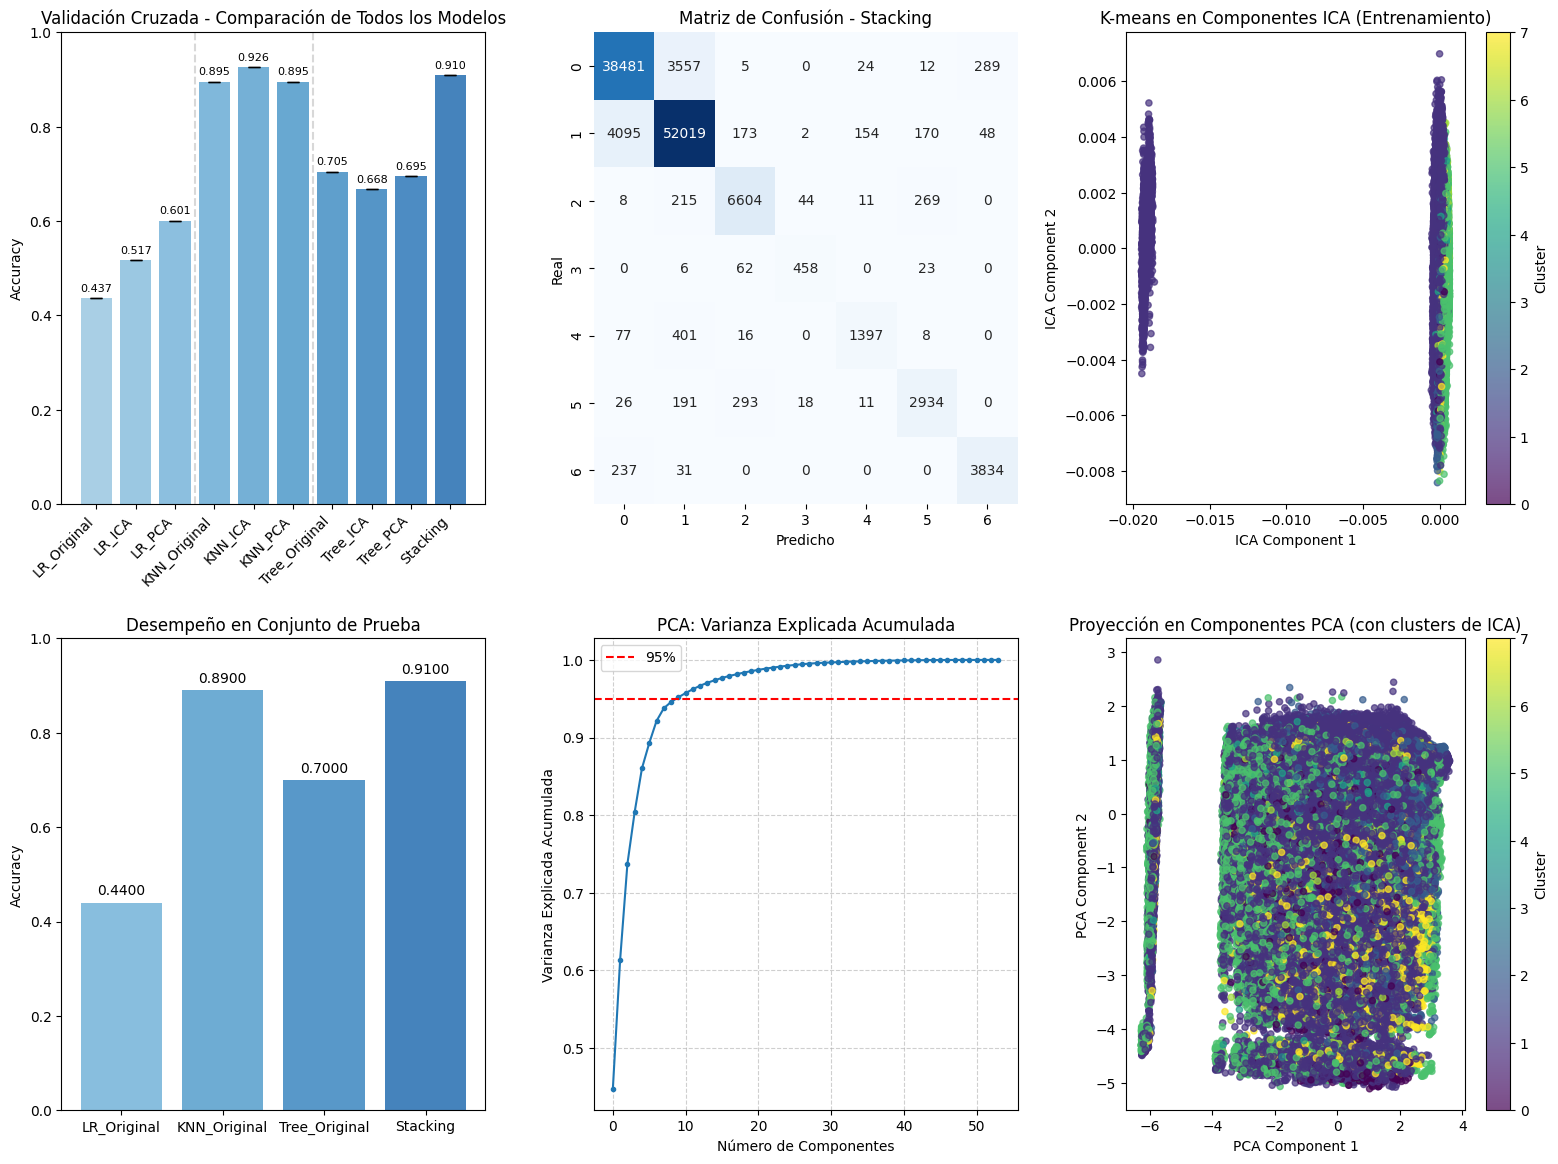

In [23]:
# Resultados de validación cruzada (puedes reemplazar con arrays reales si tienes múltiples folds)
cv_scores = {
    'LR_Original': np.array([0.4367]),
    'LR_ICA': np.array([0.5169]),
    'LR_PCA': np.array([0.6008]),
    'KNN_Original': np.array([0.8955]),
    'KNN_ICA': np.array([0.9265]),
    'KNN_PCA': np.array([0.8955]),
    'Tree_Original': np.array([0.7047]),
    'Tree_ICA': np.array([0.6678]),
    'Tree_PCA': np.array([0.6947]),
    'Stacking': np.array([0.9097])
}



# Resultados de prueba (test set)
test_scores = {
    'LR_Original': 0.44,
    'KNN_Original': 0.89,
    'Tree_Original': 0.70
}
accuracy_stacking = 0.91

# Simulación de PCA con 10 componentes
from sklearn.decomposition import PCA
pca = PCA(random_state=42)
S_PCA = pca.fit_transform(X_train)

# ==== VISUALIZACIÓN ====
plt.figure(figsize=(16, 12))

# 1. Comparación de scores de validación cruzada
plt.subplot(2, 3, 1)
models_compare = list(cv_scores.keys())
scores_means = [cv_scores[m].mean() for m in models_compare]
scores_stds = [cv_scores[m].std() for m in models_compare]

colors = plt.cm.Blues(np.linspace(0.4, 0.8, len(models_compare)))
bars = plt.bar(models_compare, scores_means, yerr=scores_stds, capsize=4, color=colors, alpha=0.8)
plt.title('Validación Cruzada - Comparación de Todos los Modelos')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Líneas divisorias entre modelos
plt.axvline(x=2.5, color='gray', linestyle='--', alpha=0.3)
plt.axvline(x=5.5, color='gray', linestyle='--', alpha=0.3)

for bar, score in zip(bars, scores_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontsize=8)

# 2. Matriz de confusión del stacking
plt.subplot(2, 3, 2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusión - Stacking')
plt.xlabel('Predicho')
plt.ylabel('Real')

# 3. Clustering en componentes ICA
plt.subplot(2, 3, 3)
scatter = plt.scatter(S_ICA[:, 0], S_ICA[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7, s=20)
plt.xlabel('ICA Component 1')
plt.ylabel('ICA Component 2')
plt.title('K-means en Componentes ICA (Entrenamiento)')
plt.colorbar(scatter, label='Cluster')

# 4. Comparación final en conjunto de prueba
plt.subplot(2, 3, 4)
test_comparison = {
    'LR_Original': test_scores.get('LR_Original', 0),
    'KNN_Original': test_scores.get('KNN_Original', 0),
    'Tree_Original': test_scores.get('Tree_Original', 0),
    'Stacking': accuracy_stacking
}
labels = list(test_comparison.keys())
values = list(test_comparison.values())
colors = plt.cm.Blues(np.linspace(0.5, 0.8, len(labels)))

bars = plt.bar(labels, values, color=colors, alpha=0.8)
plt.title('Desempeño en Conjunto de Prueba')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

for bar, val in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{val:.4f}', ha='center', va='bottom')

# 5. Varianza explicada por PCA
plt.subplot(2, 3, 5)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', markersize=3)
plt.xlabel('Número de Componentes')
plt.ylabel('Varianza Explicada Acumulada')
plt.title('PCA: Varianza Explicada Acumulada')
plt.grid(True, linestyle='--', alpha=0.6)
plt.axhline(y=0.95, color='r', linestyle='--', label='95%')
plt.legend()

# 6. Proyección en componentes PCA con clusters
plt.subplot(2, 3, 6)
scatter2 = plt.scatter(S_PCA[:, 0], S_PCA[:, 1], c=y_kmeans, cmap='viridis', alpha=0.7, s=20)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Proyección en Componentes PCA (con clusters de ICA)')
plt.colorbar(scatter2, label='Cluster')

plt.tight_layout(pad=2.0)
plt.show()


In [24]:
# REPORTE FINAL MEJORADO

print(" REPORTE FINAL DETALLADO")


# 1️ Reporte de clasificación
print("\n Classification Report - Stacking Classifier")
target_names = [f'Cover_Type_{i}' for i in range(1, 8)]
print(classification_report(y_test, y_pred, target_names=target_names))

#  Mejora sobre el mejor modelo individual
best_individual_score = max(test_scores.values()) if test_scores else 0
improvement = accuracy_stacking - best_individual_score


print(f"🔹 Mejor modelo individual (Accuracy): {best_individual_score:.4f}")
print(f"🔹 Accuracy Stacking Classifier: {accuracy_stacking:.4f}")
print(f"🔹 Mejora sobre el mejor modelo individual: {improvement:.4f}")

if improvement > 0:
    print(" El stacking classifier mejora el rendimiento")
elif improvement == 0:
    print("  El stacking alcanza el mismo rendimiento que el mejor modelo individual")
else:
    print(" El stacking classifier no mejora el rendimiento en este caso")

#  Información de componentes ICA y PCA

print(" Información de descomposición:")
print(f" - Número de componentes ICA: {S_ICA.shape[1]}")
print(f" - Número de componentes PCA: {S_PCA.shape[1]}")
var_exp_10 = np.sum(pca.explained_variance_ratio_[:10])
print(f" - Varianza explicada acumulada por las primeras 10 componentes PCA: {var_exp_10:.4f}")


#  Resumen rápido de los modelos individuales
print("\n Desempeño individual de cada modelo en conjunto de prueba:")
for model, score in test_scores.items():
    print(f" - {model}: {score:.4f}")



 REPORTE FINAL DETALLADO

 Classification Report - Stacking Classifier
              precision    recall  f1-score   support

Cover_Type_1       0.90      0.91      0.90     42368
Cover_Type_2       0.92      0.92      0.92     56661
Cover_Type_3       0.92      0.92      0.92      7151
Cover_Type_4       0.88      0.83      0.86       549
Cover_Type_5       0.87      0.74      0.80      1899
Cover_Type_6       0.86      0.84      0.85      3473
Cover_Type_7       0.92      0.93      0.93      4102

    accuracy                           0.91    116203
   macro avg       0.90      0.87      0.88    116203
weighted avg       0.91      0.91      0.91    116203

🔹 Mejor modelo individual (Accuracy): 0.8900
🔹 Accuracy Stacking Classifier: 0.9100
🔹 Mejora sobre el mejor modelo individual: 0.0200
 El stacking classifier mejora el rendimiento
 Información de descomposición:
 - Número de componentes ICA: 54
 - Número de componentes PCA: 54
 - Varianza explicada acumulada por las primeras 10 co